In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
lic = pd.read_csv("propostas_licitacao.txt", sep="|", dtype={'cod_unidade_gestora': int,'numero_licitacao': str,'cod_tipo_licitacao': int,
                                                   'cpf_cnpj': str,'nome_proponente': str, 'situacao_proposta': str})

In [4]:
mais_fatura = lic.groupby(['nome_proponente', 'valor_ofertado'])['situacao_proposta'].apply(lambda x: x[x.str.contains('Vencedora')].sum())
mais_fatura

nome_proponente                                                             valor_ofertado
(CONQUISTA) - COMERCIO DE EQUIPAMENTOS LTDA                                 156834.00                  Vencedora
/MARIA JOSÉ FAUSTINO DOS SANTOS                                             19005.00                           0
0 e L RENT CAR LOCADORA DE VEILULO                                          18000.00                   Vencedora
                                                                            20700.00                   Vencedora
01 - GABINETE DO PREFEITO.                                                  39000.00                   Vencedora
08525867000172                                                              78500.00                           0
1 CARTORIO CAMPINA GRANDE, 2 CARTO. CAMPINA GRANDE E OUTROS                 39360.00                   Vencedora
1001 IDEIAS - ARMANDO RODRIGUES DE OLIVEIRA                                 14920.00                           0
     

In [5]:
mf = mais_fatura.sort_values(ascending=False)[:10]
mf

TypeError: '<' not supported between instances of 'int' and 'str'

In [7]:
maisfat = lic.groupby(['nome_proponente','valor_ofertado']).situacao_proposta.agg(lambda g: g.eq('Vencedora').sum())
maisfat

nome_proponente                                                             valor_ofertado
(CONQUISTA) - COMERCIO DE EQUIPAMENTOS LTDA                                 156834.00         1
/MARIA JOSÉ FAUSTINO DOS SANTOS                                             19005.00          0
0 e L RENT CAR LOCADORA DE VEILULO                                          18000.00          1
                                                                            20700.00          1
01 - GABINETE DO PREFEITO.                                                  39000.00          1
08525867000172                                                              78500.00          0
1 CARTORIO CAMPINA GRANDE, 2 CARTO. CAMPINA GRANDE E OUTROS                 39360.00          1
1001 IDEIAS - ARMANDO RODRIGUES DE OLIVEIRA                                 14920.00          0
                                                                            16750.00          0
                                             

In [8]:
mft = maisfat.sort_values(ascending=False)[:10]
mft

nome_proponente                                  valor_ofertado
ASSOCICAO BALAIO NORDESTE                        2200.0            61
EULALIA ALVES DA SILVA                           2200.0            49
COMPANHIA PARAIBANA DE COMÉDIA                   1000.0            32
ARTSOM - PROMOÇÕES ARTÍSTICAS E EVENTOS LTDA     3000.0            26
                                                 2500.0            25
JOSE WALTER DA COSTA ME - J C PRODUÇÕES          2000.0            23
TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA  9450.0            22
EULALIA ALVES DA SILVA                           2500.0            21
ASSP ASSESSORIA E PLANEJAMENTO LTDA              12000.0           20
EULALIA ALVES DA SILVA                           2000.0            20
Name: situacao_proposta, dtype: int64

Text(0.5, 0, 'Total de faturamento')

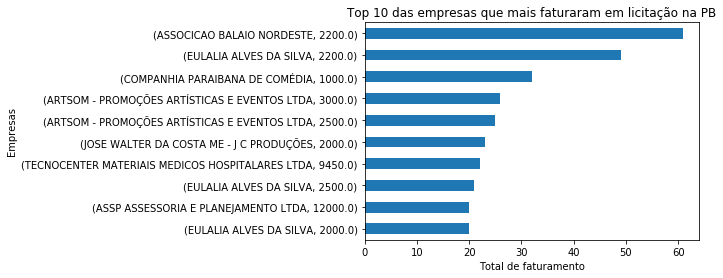

In [9]:
mft.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais faturaram em licitação na PB")
plt.ylabel('Empresas')
plt.xlabel('Total de faturamento')